In [1]:
# Imports
import cv2
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

In [3]:
training = []
for i in range(2):  
    image = x_train[i] 
    flipped_horizontally = cv2.flip(image, 1)
    flipped_vertically = cv2.flip(image, 0)
    flipped_both = cv2.flip(image, -1)
    training.append(flipped_horizontally)
    training.append(flipped_vertically)
    training.append(flipped_both)

    # Save the flipped images with unique names
    cv2.imwrite(f'image_{i}_flipped_horizontally.jpg', flipped_horizontally)
    cv2.imwrite(f'image_{i}_flipped_vertically.jpg', flipped_vertically)
    cv2.imwrite(f'image_{i}_flipped_both.jpg', flipped_both)


In [4]:
(training[0].shape)

(28, 28)

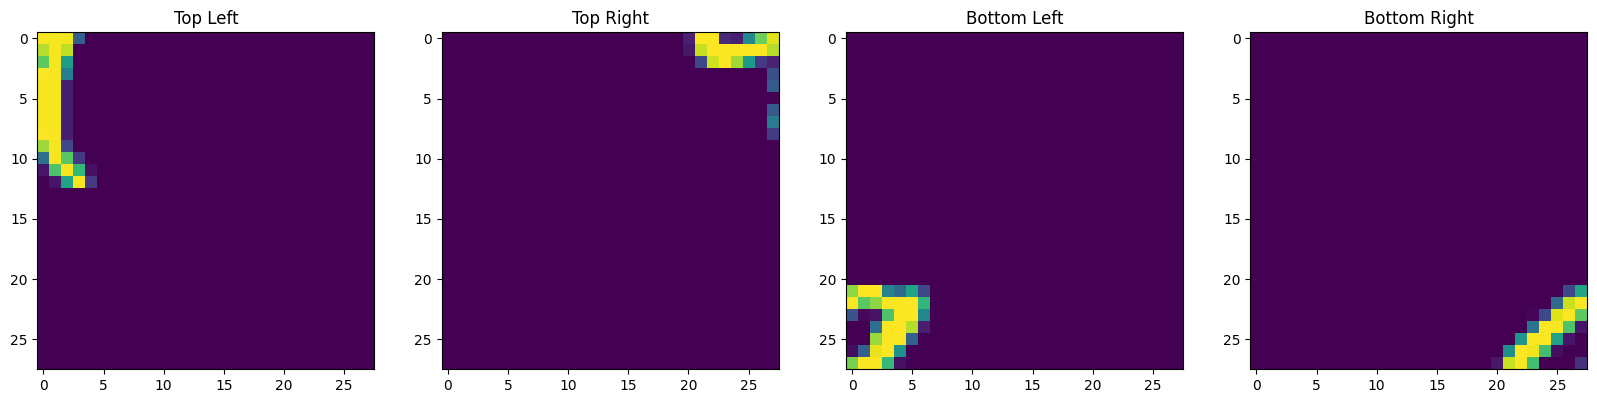

In [12]:
image = x_train[4]
rows, cols = image.shape
canvas = np.zeros_like(image)

# Shift the image to the top-left
shift_top_left = np.copy(canvas)
shift_top_left[:rows//2, :cols//2] = image[rows//2:, cols//2:]

# Shift the image to the top-right
shift_top_right = np.copy(canvas)
shift_top_right[:rows//2, cols//2:] = image[rows//2:, :cols//2]

# Shift the image to the bottom-left
shift_bottom_left = np.copy(canvas)
shift_bottom_left[rows//2:, :cols//2] = image[:rows//2, cols//2:]

# Shift the image to the bottom-right
shift_bottom_right = np.copy(canvas)
shift_bottom_right[rows//2:, cols//2:] = image[:rows//2, :cols//2]

# Display the results
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(shift_top_left, cmap='viridis')
axs[0].set_title("Top Left")
axs[1].imshow(shift_top_right, cmap='viridis')
axs[1].set_title("Top Right")
axs[2].imshow(shift_bottom_left, cmap='viridis')
axs[2].set_title("Bottom Left")
axs[3].imshow(shift_bottom_right, cmap='viridis')
axs[3].set_title("Bottom Right")

plt.show()
